In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("max_columns", None)

In [2]:
ds_dir = os.path.join(os.getcwd(), 'Datasets')
print(ds_dir)

C:\Users\liam.thornton\Documents\SF Local Python Projects\City of London Skills Review\Datasets


## Learner satisfication

In [3]:
ls_dict = {}
ls_ds_dir = os.path.join(ds_dir, 'Learner Satisfaction')

for file in os.listdir(ls_ds_dir):
    df = pd.read_csv(os.path.join(ls_ds_dir, file))
    string = file.split('_')
    key = string[4]
    ls_dict[key] = df

### Summary DF

In [97]:
smry_df = ls_dict['Summary']
smry_df.head(5)

,Year,UKPRN,Provider_Name,Organisation_Type,Final_Score,MSRC,Learners,Responses
0,2018/19,10000020,5 E LTD.,Private Sector Public Funded,97.4,NaN,922,473
1,2018/19,10000028,WOODSPEEN TRAINING LIMITED,Private Sector Public Funded,NaN,There was not enough data to award a score,-,-
2,2018/19,10000055,ABINGDON AND WITNEY COLLEGE,General FE and Tertiary College,90.1,NaN,5315,240
3,2018/19,10000060,ACACIA TRAINING AND DEVELOPMENT LTD,Private Sector Public Funded,94.8,NaN,1031,397
4,2018/19,10000061,ACACIA TRAINING LIMITED,Private Sector Public Funded,88.8,NaN,1512,670


In [7]:
## Formatting data set for analysis

def format_smry_df(df):
    # drop null rows
    test1 = df[np.logical_and(df['Final_Score'].notnull(), df['Learners'].isnull())]

    if len(test1) == 0:
        df = df[df['Final_Score'].notnull()]
        df = df[df['Final_Score']!= '-']
    for c in df.columns:
        try:
            df[c] = pd.to_numeric(df[c])
        except:
            pass
        
    print(df.dtypes)
    
    df.reset_index(drop=True, inplace=True)
    print(str(len(df) == len(df['Provider_Name'].unique())) + ' - each row is a unique provider')
    return df

smry_fdf = format_smry_df(smry_df)

Year                  object
UKPRN                  int64
Provider_Name         object
Organisation_Type     object
Final_Score          float64
MSRC                 float64
Learners               int64
Responses              int64
dtype: object
True - each row is a unique provider


#### By organisation type

In [98]:
## Exploratory analysis 

# By provider organisation type
ot_smry = smry_fdf.groupby('Organisation_Type')
ot_smry_stats1 = smry_fdf.groupby('Organisation_Type').agg({'Provider_Name': 'count',
                                                     'Learners' : ['mean', 'median', 'max', 'min', 'std'],
                                                     'Final_Score' : ['mean', 'median', 'max', 'min', 'std']})

ot_smry_stats2 = ot_smry.describe()
ot_smry_stats2 = ot_smry_stats2.iloc[:, ot_smry_stats2.columns.get_level_values(0)!='UKPRN']

for c in ot_smry_stats1.columns:
    ot_smry_stats1[c] = round(ot_smry_stats1[c],2)

for c in ot_smry_stats2.columns:
    ot_smry_stats2[c] = round(ot_smry_stats2[c],2)


ot_smry_stats1

Provider_Name Learners                       \
                                        count     mean  median    max   min   
Organisation_Type                                                             
General FE and Tertiary College           167  5695.03  5205.0  21619  1289   
Other Public Funded                        88  1662.72  1296.5  11423    22   
Private Sector Public Funded              334   816.20   318.0  30454    11   
Specialist College                         20  3991.65  2178.5  25425   159   

                                         Final_Score                      \
                                     std        mean median    max   min   
Organisation_Type                                                          
General FE and Tertiary College  2884.96       80.70  81.00   96.5  60.7   
Other Public Funded              1629.92       94.40  95.65   99.0  47.2   
Private Sector Public Funded     2057.86       85.82  88.20  100.0  43.8   
Specialist College               6214.83       81.05  80.70   97.7  48.7   

                                        
                                   std  
Organisation_Type                       
General FE and Tertiary College   6.10  
Other Public Funded               5.93  
Private Sector Public Funded     10.27  
Specialist College               12.26

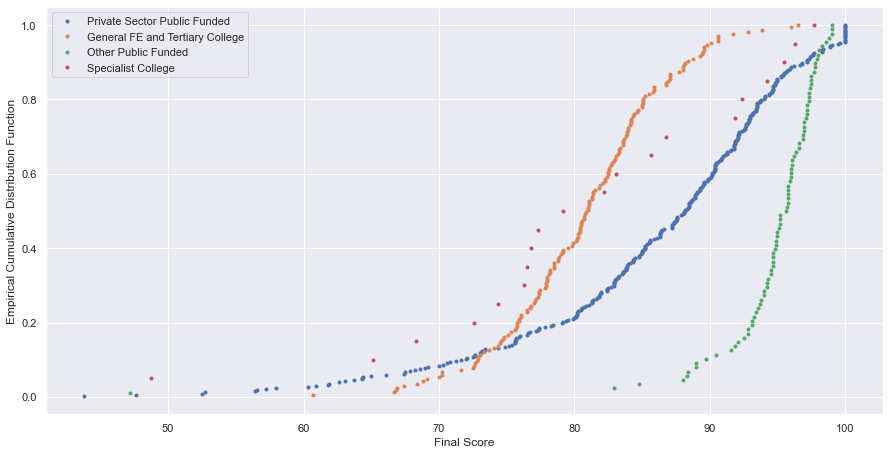

In [99]:
sns.set()
fig = plt.figure(figsize=(15,7.5))
for ot in smry_fdf['Organisation_Type'].unique():
    df = smry_fdf[smry_fdf['Organisation_Type'] == ot]
    x = np.sort(df['Final_Score'])
    y = np.arange(1, len(x)+1)/len(x)
    _ = plt.plot(x, y, marker = '.', linestyle='none')
#     percentiles = np.array([25,50,75])
#     ptiles = np.nanpercentile(x, percentiles)
#     _ = plt.plot(ptiles, percentiles/100, marker='D', linestyle='none')
#     _ = plt.legend(['ECDF', 'Quartiles'])

_ = plt.xlabel('Final Score')
_ = plt.ylabel('Empirical Cumulative Distribution Function')
_ = plt.legend(labels = smry_fdf['Organisation_Type'].unique())
_ = plt.show()

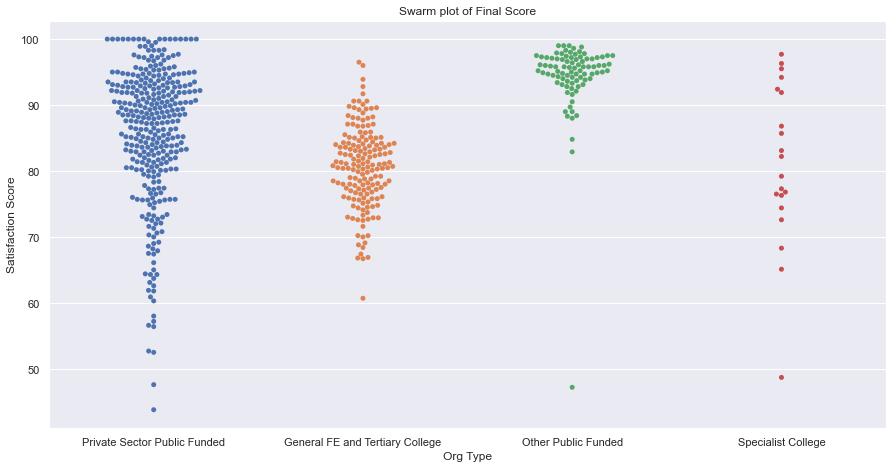

In [100]:
sns.set()
_ = plt.figure(figsize=(15,7.5))
_ = sns.swarmplot(x = 'Organisation_Type', y = 'Final_Score', data = smry_fdf)
_ = plt.xlabel('Org Type')
_ = plt.ylabel('Satisfaction Score')
_ = plt.title('Swarm plot of Final Score')

plt.show()

### By organisation size

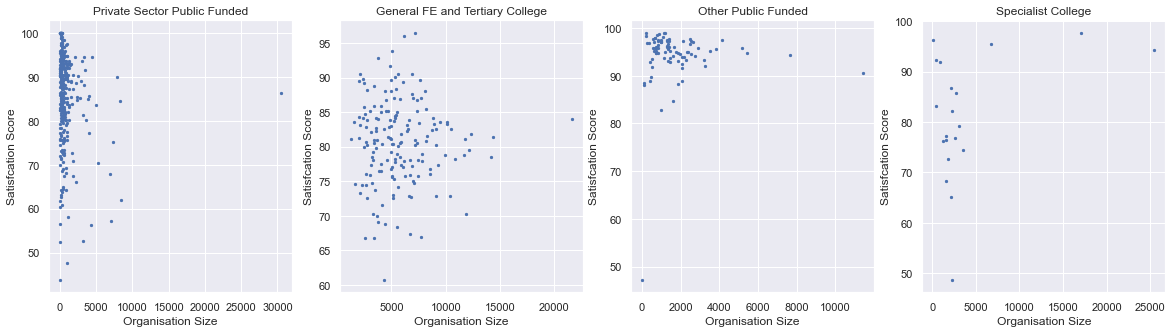

In [104]:
fig = plt.figure(figsize=(20,5))
sns.set()
for i,ot in enumerate(smry_fdf['Organisation_Type'].unique()):
    df = smry_fdf[smry_fdf['Organisation_Type'] == ot]
    _ = plt.subplot(1,4,i+1)
    _ = plt.scatter(df['Learners'], df['Final_Score'], s=5)
    _ = plt.xlabel('Organisation Size')
    _ = plt.ylabel('Satisfcation Score')
    _ = plt.title(ot)
    

plt.show()

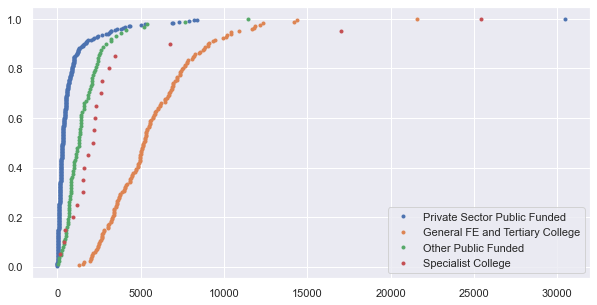

In [12]:
fig = plt.figure(figsize=(10,5))
for ot in smry_fdf['Organisation_Type'].unique():
    df = smry_fdf[smry_fdf['Organisation_Type'] == ot]
    x = np.sort(df['Learners'])
    y = np.arange(1, len(x)+1)/len(x)
    _ = plt.plot(x, y, marker = '.', linestyle='none')

_ = plt.legend(labels = smry_fdf['Organisation_Type'].unique())
plt.show()

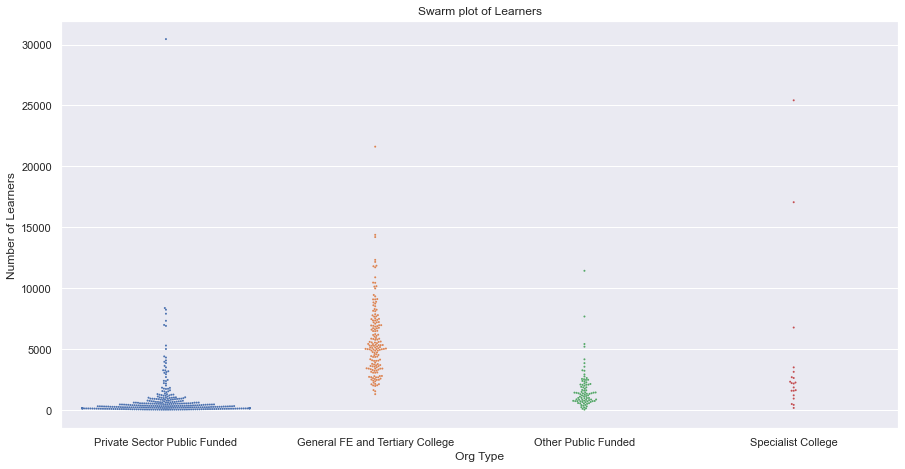

In [13]:
fig = plt.figure(figsize=(15,7.5))
_ = sns.swarmplot(x = 'Organisation_Type', y = 'Learners', size = 2, data = smry_fdf)
_ = plt.xlabel('Org Type')
_ = plt.ylabel('Number of Learners')
_ = plt.title('Swarm plot of Learners')

plt.show()

# Outcomes

In [15]:
outcomes_dir = os.path.join(ds_dir, 'Outcomes Success')
files = os.listdir(outcomes_dir)
otcms = {}
csv_files = []
for f in files:
    if f.endswith('.csv'):
        csv_files.append(f)
        split_name = f.split('.')
        key = split_name[0]
        try:
            otcms[key] = pd.read_csv(outcomes_dir + '//' + f, low_memory=False)
        except:
            pass
    else:
        pass

In [16]:
def add_rows(x):
    rows = 0
    for k, v in x.items():
        rows = rows + len(v)
    return rows

total_rows = add_rows(otcms)
print(total_rows)

5785706


### 1. CoL Outcomes Achieved

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


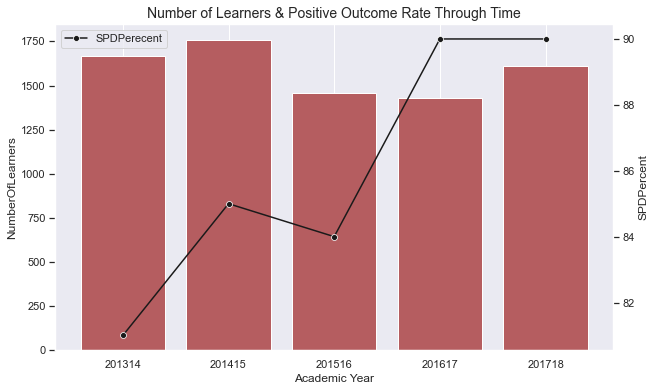

In [26]:
## number of outcomes achieved and % of positive outcomes through time 
df, col_df, rol_df, ntl_df = parse_data(otcms['ea01'], 'none', True)
oa = col_df

fig, ax1 = plt.subplots(figsize=(10,6))
ax1 = sns.barplot(x = 'time_period', y = 'NumberOfLearners', data=oa, color = 'r')
ax1.set_xlabel('Academic Year', fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(None)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'time_period', y = 'SPDPercent', data=oa, color='k', marker = 'o')
ax2.grid(None)
plt.legend(['SPDPerecent'])
plt.title('Number of Learners & Positive Outcome Rate Through Time', fontsize=14)

fig.savefig('NoL & PO through time.png')

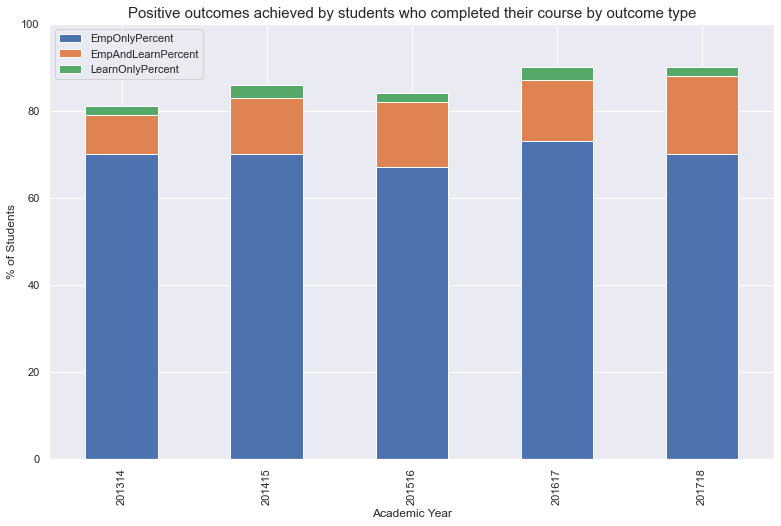

In [27]:
stck_plt=oa[['time_period', 'SPDPercent','EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].set_index('time_period')

plot = stck_plt.sort_values('time_period', ascending=True)[['EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].plot.bar(stacked=True, figsize=(13,8))  
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of Students')
_ = plt.title('Positive outcomes achieved by students who completed their course by outcome type', fontsize = 15)
_ = plt.ylim(0,100)
_ = plt.legend(labels = ['EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent'], loc = 'upper left' )
plt.show()

fig = plot.get_figure()
fig.savefig('positive destination by type.png')

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


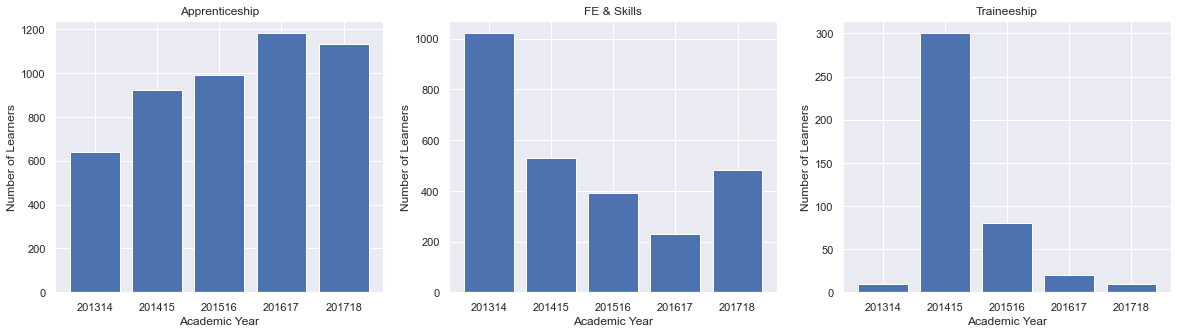

In [28]:
## Segmenting - Provision Type
pt, col_pt, rol_pt, ntl_pt = parse_data(otcms['ea01'], 2, False)

# grp
pt_gp = col_pt.groupby(['time_period', 'Provision'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
pt_gp.reset_index(drop=False, inplace=True)
pt_gp.head()

df['total_learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')

# pt_p = []
# for i, pt in enumerate(pt_gp['Provision'].unique()):
#     population = pt_gp[pt_gp['Provision']==pt]['NumberOfLearners']
#     pt_p[i] = population

pt_pop = [np.array(pd.to_numeric(pt_gp[pt_gp['Provision'] == pt]['NumberOfLearners'])) for pt in pt_gp['Provision'].unique()]

# for i,p in enumerate(pt_pop):
#     x = pt_gp['time_period'].unique()
#     if i == 0:
#         _ = plt.bar(x,p)
#     else:
#         b = [x for x in pt_pop[:i]]
#         print(b)
#         sum_b = np.add(b)
# #         print(b)
# #         print(sum_b)
#         _ = plt.bar(x,p, bottom = sum_b)

# _ = plt.legend(pt_gp['Provision'].unique())
# plt.show()

fig = plt.figure(figsize=(20,5))
for i,pt in enumerate(pt_gp['Provision'].unique()):
    plt.subplot(1,3,i+1)
    x = pt_gp['time_period'].unique()
    y = pt_gp[pt_gp['Provision']==pt]['NumberOfLearners']
    _ = plt.bar(x, y)
    _ = plt.xlabel('Academic Year')
    _ = plt.ylabel('Number of Learners')
    _ = plt.title(pt)

plt.show()

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


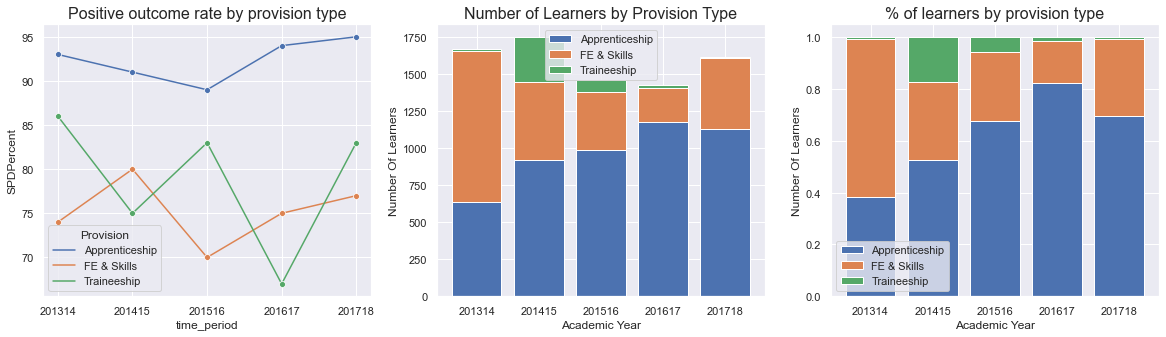

['Apprenticeship' 'FE & Skills' 'Traineeship']


In [29]:
## Segmenting - Provision Type
pt, col_pt, rol_pt, ntl_pt = parse_data(otcms['ea01'], 2, False)

# grp
pt_gp = col_pt.groupby(['time_period', 'Provision'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
pt_gp.reset_index(drop=False, inplace=True)


# plotting outcomes achieved

fig = plt.figure(figsize=(20, 5))

_ = plt.subplot(1,3,1)
_ = sns.lineplot(x = 'time_period', y = 'SPDPercent', hue ='Provision', data = pt_gp, marker = 'o')
_ = plt.title('Positive outcome rate by provision type', fontsize=16)

# _ = plt.subplot(3,2,2)
# _ = sns.lineplot(x = 'time_period', y = 'EmpAndLearnPercent', hue='Provision', data = pt_gp, marker = 'o')
# _ = plt.title('Employment and learning sustainment rate by provision type', fontsize=16)

# _ = plt.subplot(3,2,3)
# _ = sns.lineplot(x = 'time_period', y = 'EmpOnlyPercent', hue ='Provision', data = pt_gp, marker = 'o')
# _ = plt.title('Employment only sustainment rate by provision type', fontsize=16)

# _ = plt.subplot(3,2,4)
# _ = sns.lineplot(x='time_period', y='LearnOnlyPercent', hue='Provision', data = pt_gp, marker = 'o')
# _ = plt.title('Learning only sustainment rate by provision type', fontsize=16)

# bar chart showing breakdown of NumberOfLearners by Provision type per year
x = pt_gp['time_period'].unique()

fe = np.array(pt_gp[pt_gp['Provision'] == 'FE & Skills']['NumberOfLearners'])
app = np.array(pt_gp[pt_gp['Provision'] == 'Apprenticeship']['NumberOfLearners'])
trp = np.array(pt_gp[pt_gp['Provision'] == 'Traineeship']['NumberOfLearners'])

sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, app)
_ = plt.bar(x, fe, bottom = app)
_ = plt.bar(x, trp, bottom=fe+app)
_ = plt.legend(labels = pt_gp['Provision'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of Learners by Provision Type', fontsize=16)

# stacked bar chart 
t = fe + app + trp
fe_p = fe/t
app_p = app/t
trp_p = trp/t

plt.subplot(1,3,3)

_ = plt.bar(x, app_p)
_ = plt.bar(x, fe_p, bottom=app_p)
_ = plt.bar(x, trp_p, bottom= fe_p + app_p)
_ = plt.legend(labels = pt_gp['Provision'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('% of learners by provision type', fontsize=16)


plt.show()
fig.savefig('provision type.png', dpi=fig.dpi)
print(pt_gp['Provision'].unique())

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


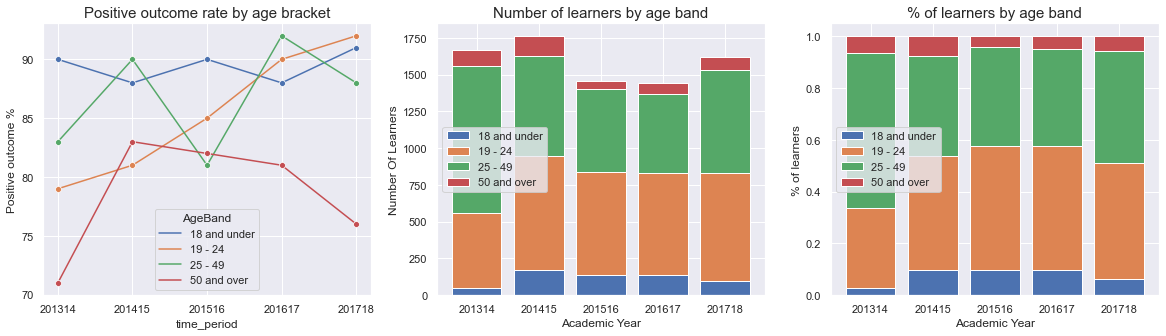

In [30]:
# subsetting dataframe 
age_df, col_age, rol_age, ntl_age = parse_data(otcms['ea01'], 0, False)

# grp
age_gp = col_age.groupby(['time_period', 'AgeBand'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
age_gp.reset_index(drop=False, inplace=True)
age_gp.head()

fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y = 'SPDPercent', hue = 'AgeBand', data=age_gp, marker='o')
_ = plt.title('Positive outcome rate by age bracket', fontsize=15)
_ = plt.ylabel('Positive outcome %')

# plt.subplot(3,2,2)
# _ = sns.lineplot(x='time_period', y = 'EmpAndLearnPercent', hue = 'AgeBand', data=age_gp, marker='o')
# _ = plt.title('Employment and learning destination rate by age bracket', fontsize=18)

# plt.subplot(3,2,3)
# _ = sns.lineplot(x='time_period', y = 'EmpOnlyPercent', hue = 'AgeBand', data=age_gp, marker='o')
# _ = plt.title('Employment destination only rate by age bracket', fontsize=18)

# plt.subplot(3,2,4)
# _ = sns.lineplot(x='time_period', y = 'LearnOnlyPercent', hue = 'AgeBand', data=age_gp, marker='o')
# _ = plt.title('Learning destination only rate by age bracket', fontsize=18)

x = age_gp['time_period'].unique()

y18 = np.array(age_gp[age_gp['AgeBand'] == '18 and under']['NumberOfLearners'])
y19_24 = np.array(age_gp[age_gp['AgeBand'] == '19 - 24']['NumberOfLearners'])
y25_49 = np.array(age_gp[age_gp['AgeBand'] == '25 - 49']['NumberOfLearners'])
y50 = np.array(age_gp[age_gp['AgeBand'] == '50 and over']['NumberOfLearners'])

# bar chart showing breakdown of NumberOfLearners by AgeBand per year
sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, y18)
_ = plt.bar(x, y19_24, bottom=y18)
_ = plt.bar(x, y25_49, bottom=y18+y19_24)
_ = plt.bar(x, y50, bottom = y18+y19_24+y25_49)
_ = plt.legend(labels = age_gp['AgeBand'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of learners by age band', fontsize=15)

# stacked bar chart 
t = y18 + y19_24 + y25_49 + y50
y18_per = y18/t
y19_24_per = y19_24/t
y25_49_per = y25_49/t
y50_per = y50/t

plt.subplot(1,3,3)

_ = plt.bar(x, y18_per)
_ = plt.bar(x, y19_24_per, bottom=y18_per)
_ = plt.bar(x, y25_49_per, bottom=y18_per+y19_24_per)
_ = plt.bar(x, y50_per, bottom = y18_per+y19_24_per+y25_49_per)
_ = plt.legend(labels = age_gp['AgeBand'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('% of learners by age band', fontsize=15)
_ = plt.ylabel('% of learners')

plt.show()
fig.savefig('Age band.png', dpi=fig.dpi)

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


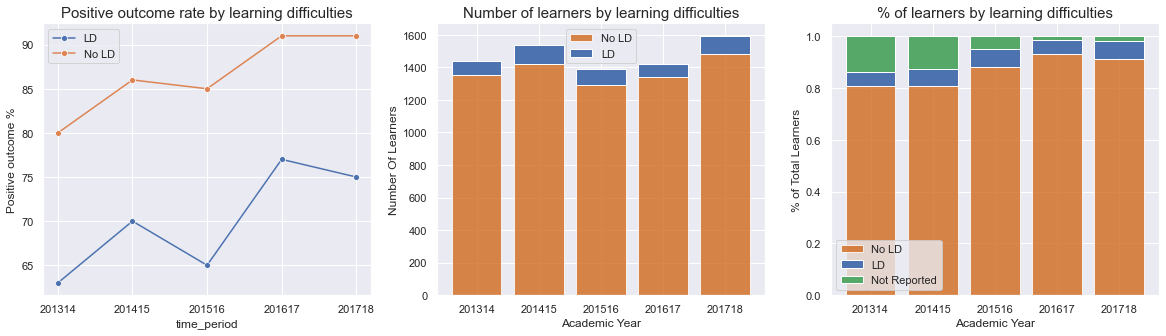

In [31]:
# subsetting dataframe 
ld_df, col_ld0, rol_ld, ntl_ld = parse_data(otcms['ea01'], 4, False)
col_ld = col_ld0[col_ld0['LearningDifficulties'] != 'Not known/ Not provided'].reset_index(drop=True)

# # grp
ld_gp0 = col_ld0.groupby(['time_period', 'LearningDifficulties'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
ld_gp = col_ld.groupby(['time_period', 'LearningDifficulties'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
ld_gp.reset_index(drop=False, inplace=True)
ld_gp0.reset_index(drop=False, inplace=True)

fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y = 'SPDPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
_ = plt.title('Positive outcome rate by learning difficulties', fontsize=15)
_ = plt.ylabel('Positive outcome %')
_ = plt.legend(['LD', 'No LD'])

# plt.subplot(3,2,2)
# _ = sns.lineplot(x='time_period', y = 'EmpAndLearnPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
# _ = plt.title('Employment and learning destination rate by learning difficulties', fontsize=18)

# plt.subplot(3,2,3)
# _ = sns.lineplot(x='time_period', y = 'EmpOnlyPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
# _ = plt.title('Employment destination only rate by learning difficulties', fontsize=18)

# plt.subplot(3,2,4)
# _ = sns.lineplot(x='time_period', y = 'LearnOnlyPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
# _ = plt.title('Learning destination only rate by learning difficulties', fontsize=18)

x = ld_gp['time_period'].unique()

wld = np.array(ld_gp[ld_gp['LearningDifficulties'] == 'Learning Difficulties/Disability']['NumberOfLearners'])
wold = np.array(ld_gp[ld_gp['LearningDifficulties'] == 'No Learning Difficulties/Disability']['NumberOfLearners'])
na = np.array(ld_gp0[ld_gp0['LearningDifficulties'] == 'Not known/ Not provided']['NumberOfLearners'])

#bar chart showing breakdown of NumberOfLearners by AgeBand per year
sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, wold, color='chocolate', alpha=0.8)
_ = plt.bar(x, wld, bottom = wold, color='b')
_ = plt.legend(labels = ['No LD','LD'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of learners by learning difficulties', fontsize=15)

#Stacked bar chart
t = wld + wold + na
wld_per = wld/t
wold_per = wold/t
na_per = na/t

plt.subplot(1,3,3)
_ = plt.bar(x, wold_per, color = 'chocolate', alpha=0.8)
_ = plt.bar(x, wld_per, bottom = wold_per, color='b')
_ = plt.bar(x, na_per, bottom = wold_per + wld_per, color = 'g')
_ = plt.legend(labels = ['No LD','LD', 'Not Reported'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of Total Learners')
_ = plt.title('% of learners by learning difficulties', fontsize=15)

plt.show()
fig.savefig('Learning Difficulties.png', dpi=fig.dpi)

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


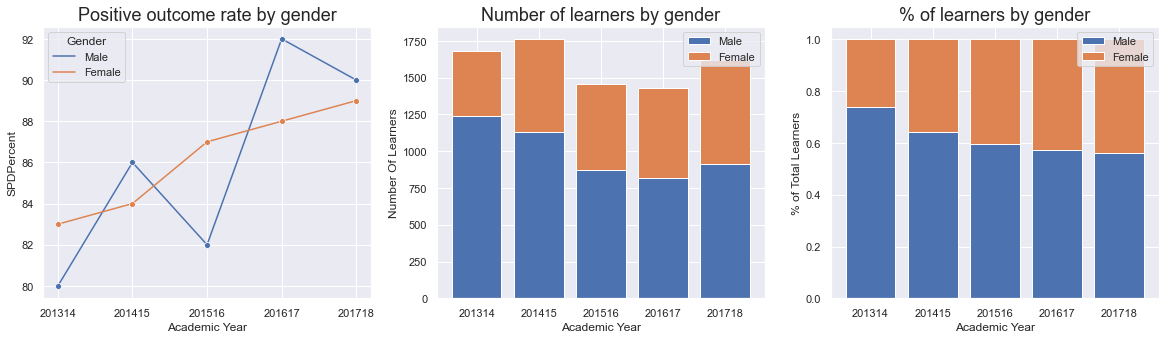

In [32]:
# subsetting dataframe 
gd_df, col_gd, rol_gd, ntl_gd = parse_data(otcms['ea01'], 1, False)

# # grp
gd_gp = col_gd.groupby(['time_period', 'Gender'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
gd_gp.reset_index(drop=False, inplace=True)
gd_gp.rename(columns = {'time_period':'Academic Year'}, inplace=True)

fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
_ = sns.lineplot(x='Academic Year', y = 'SPDPercent', hue = 'Gender', data=gd_gp.sort_values('Gender', ascending=False), marker='o')
_ = plt.title('Positive outcome rate by gender', fontsize=18)

# plt.subplot(3,2,2)
# _ = sns.lineplot(x='Academic Year', y = 'EmpAndLearnPercent', hue = 'Gender', data=gd_gp, marker='o')
# _ = plt.title('Employment and learning destination rate by gender', fontsize=18)

# plt.subplot(3,2,3)
# _ = sns.lineplot(x='Academic Year', y = 'EmpOnlyPercent', hue = 'Gender', data=gd_gp, marker='o')
# _ = plt.title('Employment destination only rate by gender', fontsize=18)

# plt.subplot(3,2,4)
# _ = sns.lineplot(x='Academic Year', y = 'LearnOnlyPercent', hue = 'Gender', data=gd_gp, marker='o')
# _ = plt.title('Learning destination only rate by gender', fontsize=18)

x = gd_gp['Academic Year'].unique()

m = np.array(gd_gp[gd_gp['Gender'] == 'Male']['NumberOfLearners'])
f = np.array(gd_gp[gd_gp['Gender'] == 'Female']['NumberOfLearners'])


# stacked bar chart showing breakdown of NumberOfLearners by AgeBand per year
sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, m)
_ = plt.bar(x, f, bottom = m)
_ = plt.legend(labels = ['Male','Female'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of learners by gender', fontsize=18)

# stacked percent
t = m + f
m_per = m/t
f_per = f/t

plt.subplot(1,3,3)
_ = plt.bar(x, m_per)
_ = plt.bar(x, f_per, bottom = m_per)
_ = plt.legend(labels = ['Male','Female'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of Total Learners')
_ = plt.title('% of learners by gender', fontsize=18)

plt.show()
fig.savefig('Gender.png', dpi=fig.dpi)

### 2. Benchmarking CoL Outcomes Achieved to Regional and National Provision

In [17]:
def create_filters(df):
    c1 = df['AgeBand'] == 'Total'
    c2 = df['Gender'] == 'Total'
    c3 = df['Provision'] == 'Total'
    c4 = df['LevelOfLearning'] == 'Total'
    c5 = df['LearningDifficulties'] == 'Total'
    filters = [c1, c2, c3, c4, c5]
    return filters


def apply_filters(df, seg_ind, keep_total):
    filters = create_filters(df)
    if seg_ind == 'none':
        pass
    elif keep_total==True:
        filters.pop(seg_ind)
    else:
        df = df[~filters[seg_ind]]
        filters.pop(seg_ind)
    for f in filters:
        df = df[f]
    df.reset_index(drop=True, inplace=True)
    return df

def parse_data(df, seg_ind, keep_total):
    df.replace(to_replace = 'c', value=np.nan, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    for c in df.columns:
        if c == 'time_period':
            df[c] = df[c].astype(str)
        else:
            try:
                df[c] = pd.to_numeric(df[c])
            except:
                pass
            
    filters = create_filters(df)
    df = apply_filters(df, seg_ind, keep_total)
    
    df = df.sort_values('time_period', ascending=True).reset_index(drop=True)
    
    # CoL only
    col_df = df[df['la_name'] == 'City of London'].reset_index(drop=True)
    
    # RoL (excludes CoL)
    rol_df = df[(df['region_name']=='London') & (df['la_name']!='City of London') & 
                (df['geographic_level']=='Local authority')].reset_index(drop=True)
    
    # Ntl (excluding CoL)
    ntl_df = df[(df['la_name'] != 'City of London') & 
                (df['geographic_level']=='Local authority')].reset_index(drop=True)
    
    return df, col_df, rol_df, ntl_df

In [18]:
## might be worth calculating slightly differntly here - i.e. summing non null NumberOfLearners rows per year and
## divinding by the number of non-null rows to give an average per year?

## population delta - for all local authorities in the london and national data sets, calculate the five year population change
## then calculate the average, ignoring null rows?

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]
C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


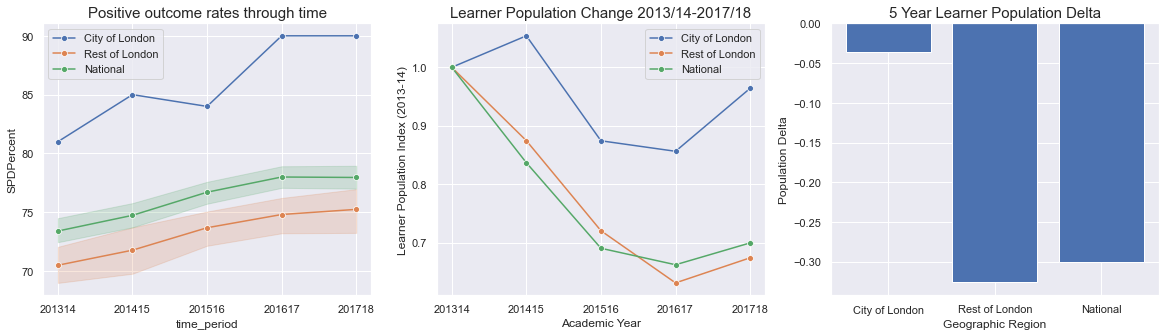

In [19]:
## comparing student populations through time - bar chart of 5 year % change and line plot comparing CoL to RoL and Ntl
df, col_df, rol_df, ntl_df = parse_data(otcms['ea01'], 'none', True)
geo_regions = ['City of London', 'Rest of London', 'National']

fig = plt.figure(figsize=(20,5))
#
plt.subplot(1,3,1)

_ = sns.lineplot(x='time_period', y='SPDPercent', data=col_df, marker = 'o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=rol_df, marker = 'o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=ntl_df, marker = 'o')
_ = plt.legend(labels = geo_regions)
_ = plt.title('Positive outcome rates through time', fontsize=15)


## line plot change showing indexed population change from 2013-2014
col_lp = col_df[['time_period', 'NumberOfLearners']]
rol_lp = rol_df.groupby('time_period')[['NumberOfLearners']].sum().reset_index(drop=False)
ntl_lp = ntl_df.groupby('time_period')[['NumberOfLearners']].sum().reset_index(drop=False)

lp_dfs = [col_lp, rol_lp, ntl_lp]

for df in lp_dfs:
    for i in df.index:
        df.loc[i, 'Indexed LP'] = df.loc[i, 'NumberOfLearners']/df.loc[0, 'NumberOfLearners']


plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='Indexed LP', data=col_lp, marker='o')
_ = sns.lineplot(x='time_period', y='Indexed LP', data=rol_lp, marker='o')
_ = sns.lineplot(x='time_period', y='Indexed LP', data=ntl_lp, marker='o')
_ = plt.legend(labels=geo_regions)
_ = plt.ylabel('Learner Population Index (2013-14)')
_ = plt.xlabel('Academic Year')
_ = plt.title('Learner Population Change 2013/14-2017/18', fontsize=15)

pd_5y = pd.DataFrame(columns=['Area', '5yr Population Delta'])

for i, df in enumerate(lp_dfs):
#     end=float(df[df['time_period'] == '201718']['Indexed LP'])
#     start=df[df['time_period'] == '201314']['Indexed LP']
#     delta = end-start
    pdelta = float(df[df['time_period'] == '201718']['Indexed LP'] - 1)
    area = geo_regions[i]
    pd_5y = pd_5y.append({'Area':area, '5yr Population Delta':pdelta}, ignore_index=True)

plt.subplot(1,3,3)
_ = plt.bar(geo_regions, pd_5y['5yr Population Delta'])
_ = plt.xlabel('Geographic Region')
_ = plt.ylabel('Population Delta')
_ = plt.title('5 Year Learner Population Delta', fontsize=15)

plt.show()
fig.savefig('Population change and positive outcome rates.png', dpi=fig.dpi)

### Segmentations
#### 1.1 Learning Difficulties

In [20]:
ld, col_ld, rol_ld, ntl_ld = parse_data(otcms['ea01'], 4, False)

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


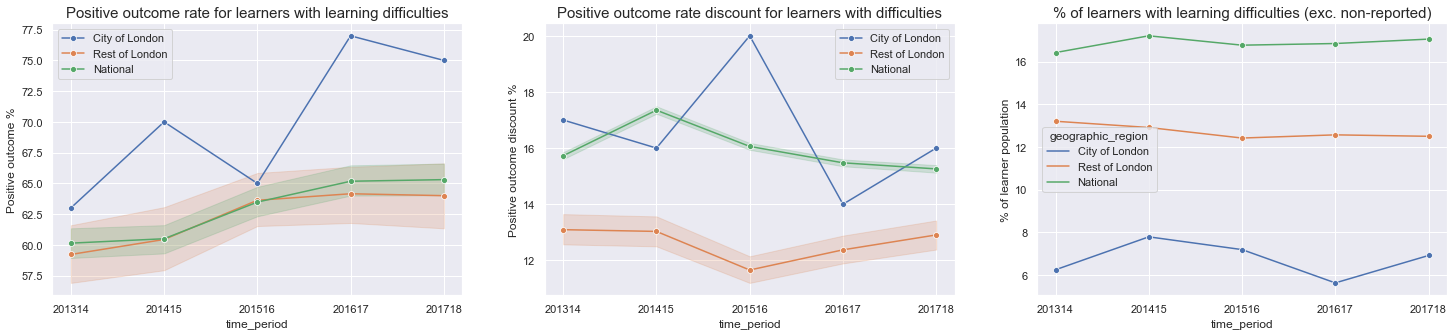

In [21]:
## benchmarking CoL performance to RoL and NtL for LD users
fig = plt.figure(figsize=(25,5))

reg_labels = ['City of London', 'Rest of London', 'National']
plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='SPDPercent', data=col_ld[col_ld['LearningDifficulties'] == 'Learning Difficulties/Disability'], marker='o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=rol_ld[rol_ld['LearningDifficulties'] == 'Learning Difficulties/Disability'], marker='o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=ntl_ld[ntl_ld['LearningDifficulties'] == 'Learning Difficulties/Disability'], marker='o')
_ = plt.legend(labels = reg_labels)
_ = plt.title('Positive outcome rate for learners with learning difficulties', fontsize=15)
_ = plt.ylabel('Positive outcome %')

plt.subplot(1,3,2)
ld_dfs = [col_ld, rol_ld, ntl_ld]
for df in ld_dfs:
    df1 = df[df['LearningDifficulties'] != 'Not known/ Not provided']
    df2 = df1[df1['LearningDifficulties'] == 'Learning Difficulties/Disability'][['time_period','SPDPercent']].reset_index(drop=True)
    df3 = df1[df1['LearningDifficulties'] == 'No Learning Difficulties/Disability'][['time_period','SPDPercent']].reset_index(drop=True)
    df4 = df2.merge(df3, on='time_period', how='inner', suffixes = ('_ld', '_nld'))
    df4['ld_SPD_gap'] = df4['SPDPercent_nld'] - df4['SPDPercent_ld']
    _ = sns.lineplot(x='time_period', y='ld_SPD_gap', data = df4, marker = 'o')
    
_ = plt.legend(labels = reg_labels)
_ = plt.title('Positive outcome rate discount for learners with difficulties', fontsize=15)
_ = plt.ylabel('Positive outcome discount %')

plt.subplot(1,3,3)
ldp_df = pd.DataFrame(columns = ['time_period','NumberOfLearners_ld', 'NumberOfLearners_nld', 'ld_%', 'geographic_region'])
for i, df in enumerate(ld_dfs):
    df1 = df[df['LearningDifficulties'] != 'Not known/ Not provided']
    df2 = df1[df1['LearningDifficulties'] == 'Learning Difficulties/Disability'].groupby('time_period')[['NumberOfLearners']].sum()
    df3 = df1[df1['LearningDifficulties'] == 'No Learning Difficulties/Disability'].groupby('time_period')[['NumberOfLearners']].sum()
    df4 = df2.join(df3, how='inner', lsuffix = '_ld', rsuffix = '_nld')
    df4['ld_%'] = (df4['NumberOfLearners_ld']/(df4['NumberOfLearners_ld'] + df4['NumberOfLearners_nld']))*100
    if i == 0:
        df4['geographic_region'] = 'City of London'
    elif i == 1:
        df4['geographic_region'] = 'Rest of London'
    elif i == 2:
        df4['geographic_region'] = 'National'
    df4.reset_index(drop=False, inplace=True)
    ldp_df = ldp_df.append(df4)

_ = sns.lineplot(x='time_period', y='ld_%', hue='geographic_region', data=ldp_df, marker ='o')
_ = plt.title('% of learners with learning difficulties (exc. non-reported)', fontsize=15)
_ = plt.ylabel('% of learner population')
plt.show()

## note on the % of ld students - % is of those that have specified learning disabled or not (does not include unstated pop)
fig.savefig('Learning difficulties benchmarking.png', dpi=fig.dpi)

#### 1.2 Provision Type

In [22]:
pt, col_pt, rol_pt, ntl_pt = parse_data(otcms['ea01'], 2, False)

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


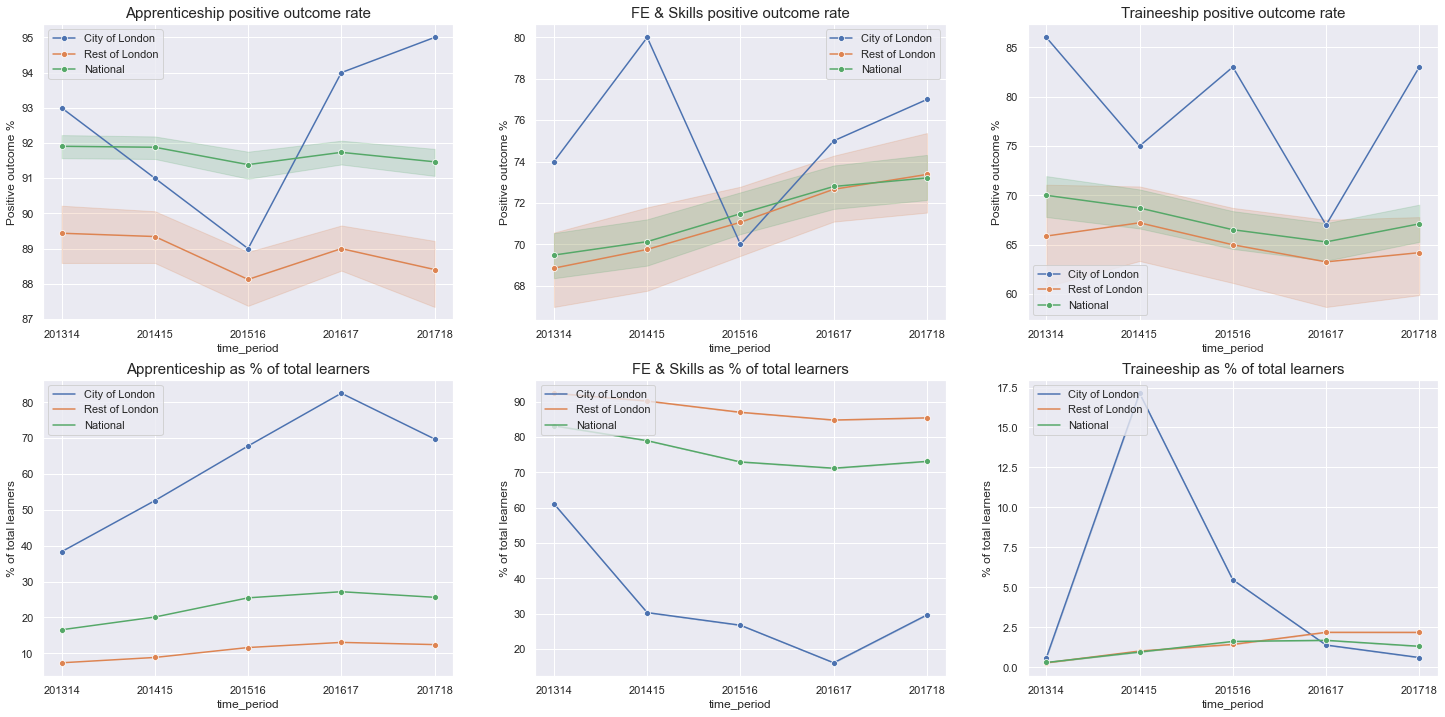

In [23]:
## row 1 - Benchmarking positive destination rates by provision type to rest of london and England

fig = plt.figure(figsize = (25,12))

provision_types = col_pt['Provision'].unique()
pt_dfs = [col_pt, rol_pt, ntl_pt]
reg_labels = ['City of London', 'Rest of London', 'National']
ptp_df = pd.DataFrame(columns = ['time_period', 'Provision', 'pt_%', 'geographic_region'])

for i, pt in enumerate(provision_types):
    plot_index = i + 1
    _ = plt.subplot(2,3,plot_index)
    for df in pt_dfs:
        _ = sns.lineplot(x='time_period', y='SPDPercent', data = df[df['Provision']==pt], marker = 'o')
        _ = plt.legend(labels = reg_labels)
        _ = plt.title(pt + ' positive outcome rate', fontsize=15)
        _ = plt.ylabel('Positive outcome %')

    
    for i, df in enumerate(pt_dfs):
        df = df.groupby(['time_period', 'Provision'])[['NumberOfLearners']].sum().reset_index(drop=False)
        df['total_learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
        df['pt_%'] = (df['NumberOfLearners']/df['total_learners'])*100
        df = df[['time_period', 'Provision', 'pt_%']]
        df['geographic_region'] = reg_labels[i]
        ptp_df = ptp_df.append(df).reset_index(drop=True)
    
    
    _ = plt.subplot(2,3,plot_index + 3)
    _ = sns.lineplot(x='time_period',y='pt_%', data=ptp_df[ptp_df['Provision']==pt], hue='geographic_region', marker ='o')
    _ = plt.title(pt + ' as % of total learners', fontsize=15)
    _ = plt.ylabel('% of total learners')
    _ = plt.legend(loc='upper left')

fig.savefig('Provisiont type benchmarking.png', dpi=fig.dpi)

#### 1.3 Age Bracket

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


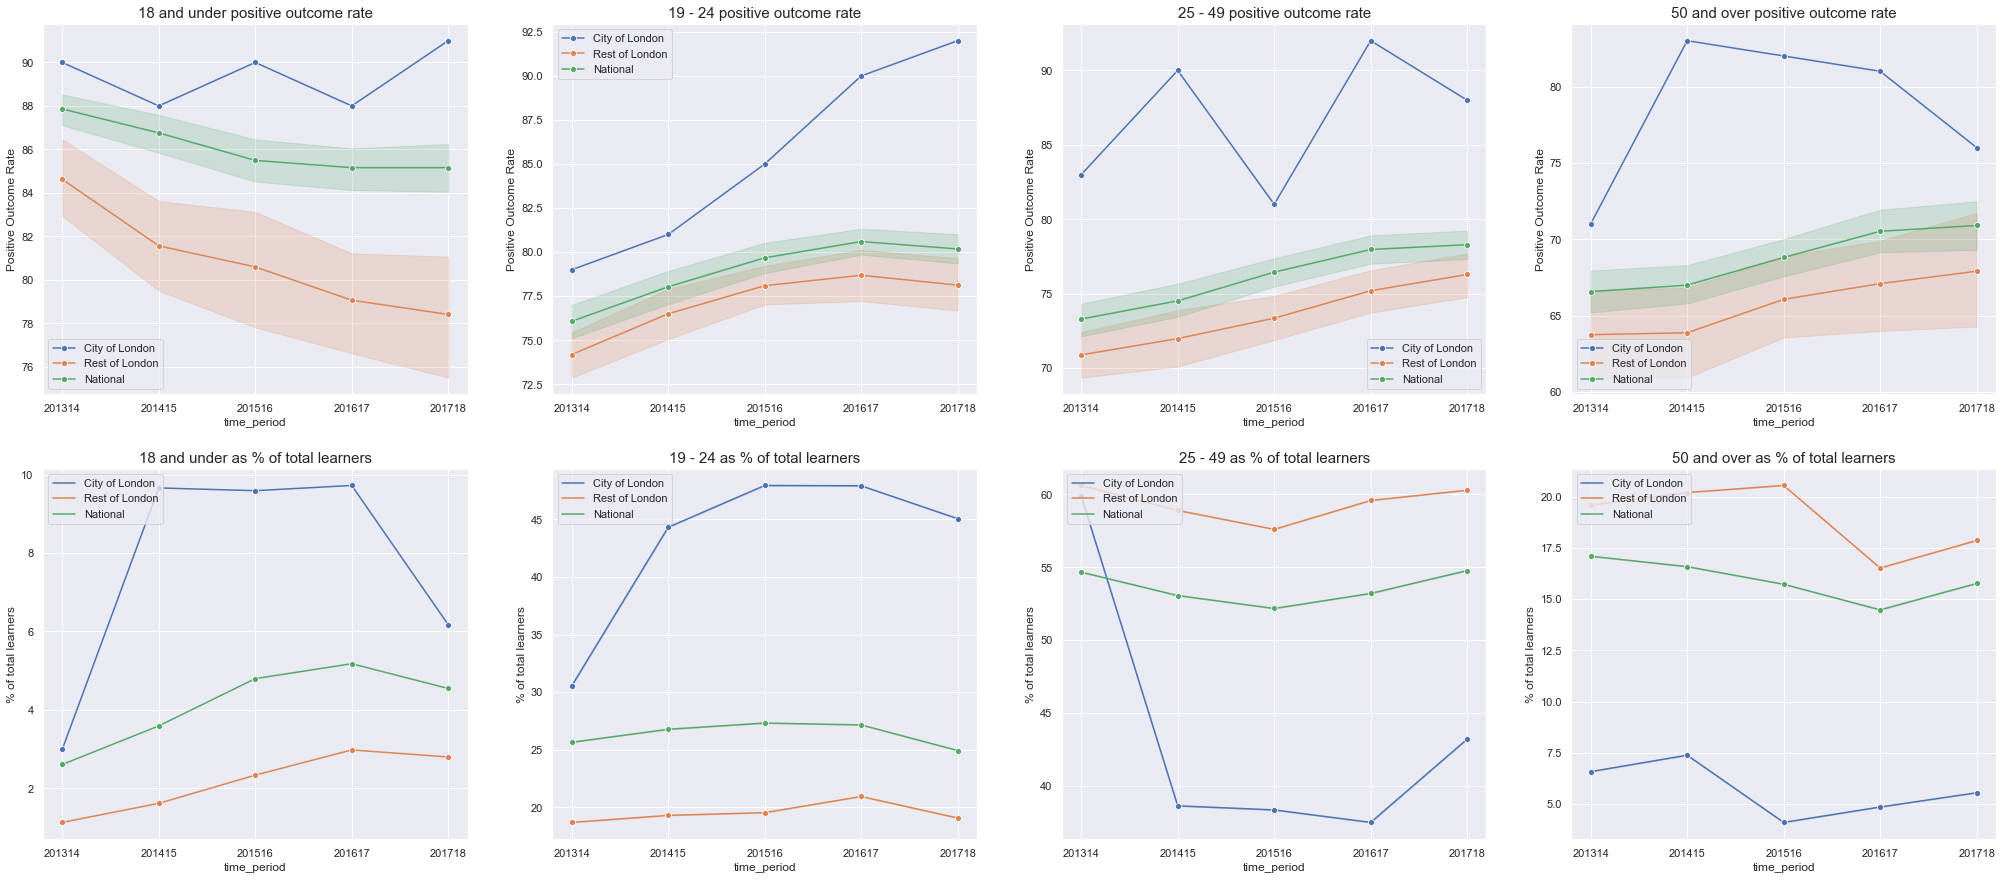

In [24]:
age, col_age, rol_age, ntl_age = parse_data(otcms['ea01'], 0, False)

fig = plt.figure(figsize = (35,15))

age_bands = sorted(col_age['AgeBand'].unique())
age_dfs = [col_age, rol_age, ntl_age]
reg_labels = ['City of London', 'Rest of London', 'National']
abp_df = pd.DataFrame()

for i, age in enumerate(age_bands):
    plot_index = i + 1
    _ = plt.subplot(2,4,plot_index)
    for df in age_dfs:
        _ = sns.lineplot(x='time_period', y='SPDPercent', data = df[df['AgeBand']==age], marker = 'o')
        _ = plt.legend(labels = reg_labels)
        _ = plt.title(age + ' positive outcome rate', fontsize=15)
        _ = plt.ylabel('Positive Outcome Rate')
    
    for i, df in enumerate(age_dfs):
        df = df.groupby(['time_period', 'AgeBand'])[['NumberOfLearners']].sum().reset_index(drop=False)
        df['total_learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
        df['ab_%'] = (df['NumberOfLearners']/df['total_learners'])*100
        df = df[['time_period', 'AgeBand', 'ab_%']]
        df['geographic_region'] = reg_labels[i]
        abp_df = abp_df.append(df).reset_index(drop=True)
    
    _ = plt.subplot(2,4,plot_index + 4)
    _ = sns.lineplot(x='time_period',y='ab_%', data=abp_df[abp_df['AgeBand']==age], hue='geographic_region', marker = 'o')
    _ = plt.title(age + ' as % of total learners', fontsize=15)
    _ = plt.ylabel('% of total learners')
    _ = plt.legend(loc='upper left')

fig.savefig('Age bucket type benchmarking.png', dpi=fig.dpi)

#### 1.4 Gender

<ipython-input-17-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


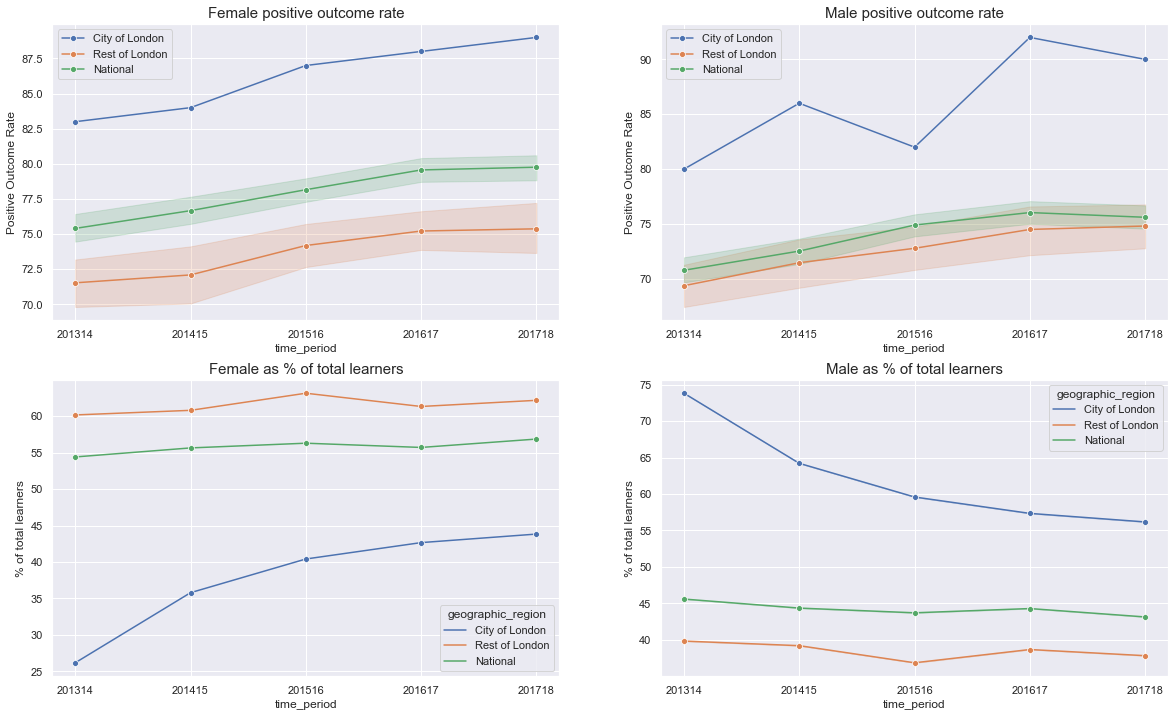

In [25]:
gn, col_gn, rol_gn, ntl_gn = parse_data(otcms['ea01'], 1, False)

fig = plt.figure(figsize = (20,12))

genders = col_gn['Gender'].unique()
gn_dfs = [col_gn, rol_gn, ntl_gn]
reg_labels = ['City of London', 'Rest of London', 'National']
gnp_df = pd.DataFrame()

for i, g in enumerate(genders):
    plot_index = i + 1
    _ = plt.subplot(2,2,plot_index)
    for df in gn_dfs:
        _ = sns.lineplot(x='time_period', y='SPDPercent', data = df[df['Gender']==g], marker = 'o')
        _ = plt.legend(labels = reg_labels)
        _ = plt.title(g + ' positive outcome rate', fontsize=15)
        _ = plt.ylabel('Positive Outcome Rate')
    
    for i, df in enumerate(gn_dfs):
        df = df.groupby(['time_period', 'Gender'])[['NumberOfLearners']].sum().reset_index(drop=False)
        df['total_learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
        df['gn_%'] = (df['NumberOfLearners']/df['total_learners'])*100
        df = df[['time_period', 'Gender', 'gn_%']]
        df['geographic_region'] = reg_labels[i]
        gnp_df = gnp_df.append(df).reset_index(drop=True)
    
    
    _ = plt.subplot(2,2,plot_index + 2)
    _ = sns.lineplot(x='time_period',y='gn_%', data=gnp_df[gnp_df['Gender']==g], hue='geographic_region', marker = 'o')
    _ = plt.title(g + ' as % of total learners', fontsize=15)
    _ = plt.ylabel('% of total learners')

plt.show()
fig.savefig('Gender type benchmarking.png', dpi=fig.dpi)

### 3. Benchmarking ethnicity data for later use if applicable

In [33]:
def filter_dataset(df, col_tf, keep_total):
    cols = df.columns
    df.replace(to_replace = 'c', value=np.nan, inplace=True)
    
    # Creates filters
    cols = list(df.columns)
    filter_cols = cols[cols.index('Gender'):cols.index('NumberOfLearners')]
    filters = []
    for c in filter_cols:
        f = df[c] == 'Total'
        filters.append(f)
    
    # Applies filters
    if col_tf == 'none':
        pass
    else:
        seg_ind = filter_cols.index(col_tf)
        if keep_total==True:
            filters.pop(seg_ind)
        else:
            df = df[~filters[seg_ind]]
            filters.pop(seg_ind)
    for f in filters:
        df = df[f]
    df.reset_index(drop=True, inplace=True)
    
    # Converts datatypes
    for c in df.columns:
        if c == 'time_period':
            df[c] = df[c].astype(str)
        else:
            try:
                df[c] = pd.to_numeric(df[c])
            except:
                pass
    return df

In [34]:
def parse_for_learners_and_SPD(df, column_name):
    df = df.groupby(['time_period', column_name]).sum()[['NumberOfLearners', 'SPDPercent']].reset_index(drop=False)
    df['total learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
    df['% of learners'] = (df['NumberOfLearners']/df['total learners'])*100
    
    mrg_df = pd.DataFrame()
    values = df[column_name].unique()
    for i,v in enumerate(values):
        cols = ['time_period', 'SPDPercent']
        df1 = df[df[column_name] == v][cols]
        if i == 0:
            mrg_df = mrg_df.append(df1)
        else:
            mrg_df = mrg_df.merge(df1, how='inner', on='time_period', suffixes=('_{}'.format(values[i-1]), '_{}'.format(v)))
            
    mrg_df['gap'] = mrg_df[mrg_df.columns[-1]] - mrg_df[mrg_df.columns[1]]
    return df, mrg_df

<ipython-input-33-2c63117fcbc3>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


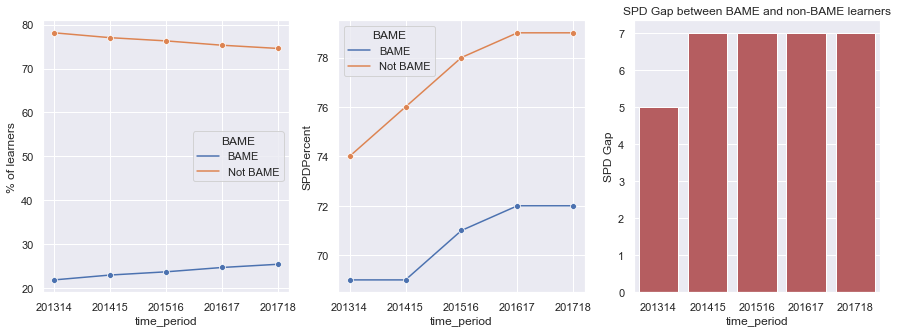

In [35]:
## BAME learners - excluding non-reported?
bame_df = filter_dataset(otcms['nd01'], 'BAME', False)
bame_df = bame_df[bame_df['BAME']!='Unknown']

bame_gp, bame_gap = parse_for_learners_and_SPD(bame_df, 'BAME')

fig = plt.figure(figsize=(15,5))

#(1) Percentage of average cohort is BAME?
_ = plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='% of learners', hue='BAME', data=bame_gp, marker='o')

#(2) What SPD rate do BAME achieve?
_ = plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='SPDPercent', hue='BAME', data=bame_gp, marker='o')

#(3) Average gap between BAME and non BAME SPD?

_ = plt.subplot(1,3,3)
_ = sns.barplot(x='time_period', y='gap', data=bame_gap, color='r')
_ = plt.ylabel('SPD Gap')
_ = plt.title('SPD Gap between BAME and non-BAME learners')

plt.show()

<ipython-input-33-2c63117fcbc3>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


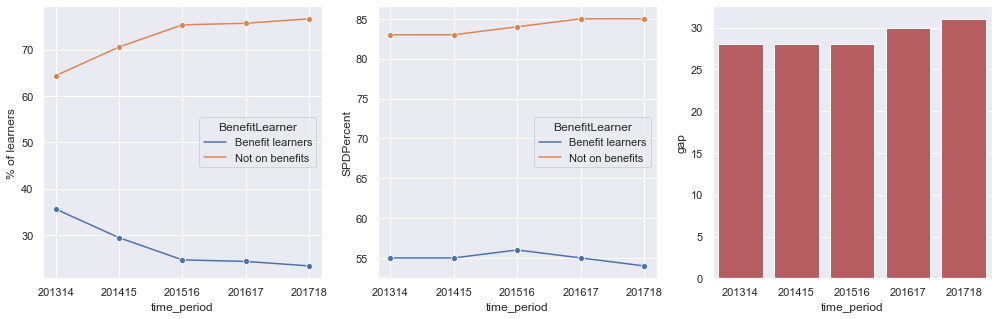

In [36]:
## Benefit Learners
bnft_df = filter_dataset(otcms['nd01'], 'BenefitLearner', False)
bnft_gp, bnft_gap = parse_for_learners_and_SPD(bnft_df, 'BenefitLearner')

fig = plt.figure(figsize=(17,5))
# (1) % of cohort by benefit status
_ = plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='% of learners', hue='BenefitLearner', data=bnft_gp, marker='o')

# (2) SPD rates by benefit status
_ = plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='SPDPercent', hue='BenefitLearner', data=bnft_gp, marker='o')

# (3) the gap between learners
_ = plt.subplot(1,3,3)
_ = sns.barplot(x='time_period', y='gap', data=bnft_gap, color='r')
plt.show()

<ipython-input-33-2c63117fcbc3>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


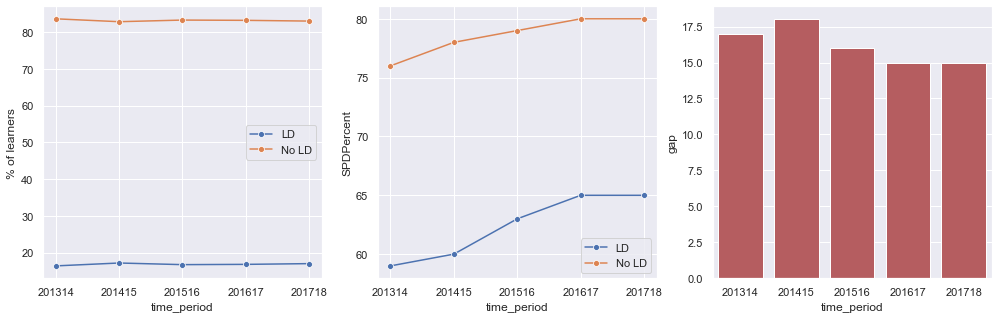

In [37]:
# Learning difficulties
ld_df = filter_dataset(otcms['nd01'], 'LearningDifficulties', False)
ld_df = ld_df[ld_df['LearningDifficulties']!='Not known/ Not provided']
ld_gp, ld_gap = parse_for_learners_and_SPD(ld_df, 'LearningDifficulties')

fig = plt.figure(figsize=(17,5))
# (1) % of cohort by ld status
_ = plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='% of learners', hue='LearningDifficulties', data=ld_gp, marker='o')
_ = plt.legend(['LD', 'No LD'])

# (2) SPD rates by ld status
_ = plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='SPDPercent', hue='LearningDifficulties', data=ld_gp, marker='o')
_ = plt.legend(['LD', 'No LD'])

# (3) the gap between learners
_ = plt.subplot(1,3,3)
_ = sns.barplot(x='time_period', y='gap', data=ld_gap, color='r')
plt.show()

### 4. CoL Apprenticeship Data

In [92]:
datasets = os.listdir(ds_dir)
app = datasets.index('CoL Apprenticeships')
file_path = os.path.join(ds_dir, datasets[app], 'Apprentice Data.xlsx')
col_app = pd.read_excel(file_path)

## Simplifying ehtnicity categories
def simplify_ethnic_category(df):
    col = 'Ethnic Group'
    not_bame = ['31 - English / Welsh / Scottish / Northen Irish / British', '34 - Any other white background']
    unknown = ['98 - Any other ethnic group', '99 - Not provided']
    mixed = [eg for eg in df[col].unique() if 'and' in eg]
    bame = [eg for eg in df[col].unique() if (eg not in not_bame) & (eg not in unknown) & (eg not in mixed)]
    fdf = df.copy
    df['Ethnic Group S'] = np.where(df[col].isin(bame), 'BAME',
                                   np.where(df[col].isin(not_bame), 'Not Bame', 
                                            np.where(df[col].isin(mixed), 'Mixed','Not specified')
                                           )
                                        )
    df.drop(columns=['Ethnic Group'], inplace=True)
    df.rename(columns={'Ethnic Group S':col}, inplace=True)
    return df

def simplify_age_category(df):
    col = 'Age Range (Inclusive)'
    new_ranges = [['18-19', '20-21', '22-25'], ['26-29', '30-29', '40-49'], ['50-59']]
    df['Age Range'] = np.where(df[col].isin(new_ranges[0]),'18-25',
                               np.where(df[col].isin(new_ranges[1]), '26-49', '50+')
                               )
    df = df.drop(columns=col)
    return df

app_df = simplify_ethnic_category(col_app)
app_fdf = simplify_age_category(app_df)

CoL demographic population data estimates
CoL 'Curriculum Rationale' document - 28% BAME, 55% Male, 2/3rds (of 8700) are 16-64(working age)
LDS info (2018) - population of 7681, 29.5% BAME,  55.6% Male, 71% 16-64,
(https://iao.blob.core.windows.net/publications/reports/f11c199d237c4cb79bca5427bfe8511d/E09000001.html)

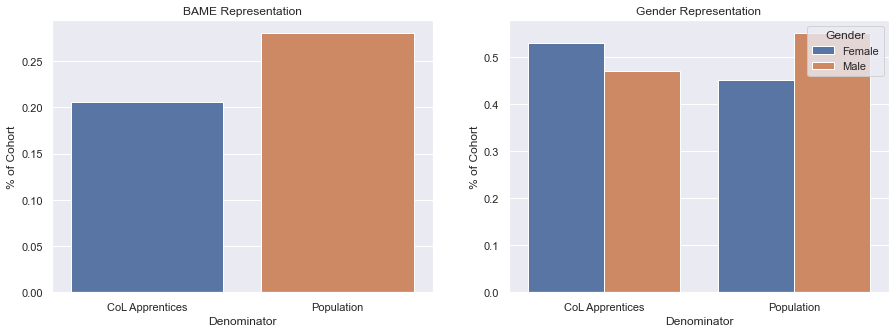

In [94]:
comparable = ['Gender', 'Ethnic Group']

fig = plt.figure(figsize=(15,5))
for c in comparable:
    df = app_fdf[c].value_counts(normalize=True).to_frame().reset_index(drop=False).rename(columns={c:'%', 'index':c})
    df['Denominator'] ='CoL Apprentices'
    if c == 'Ethnic Group':
        df = df[df['Ethnic Group'] == 'BAME']
        df2 = pd.DataFrame()
        df2[[c, '%', 'Denominator']] = [['BAME', 0.28, 'Population']]
        df = df.append(df2)
        _ = plt.subplot(1,2,1)
        _ = sns.barplot(data=df, x='Denominator', y='%')
        _ = plt.title('BAME Representation')
    else:
        df2 = pd.DataFrame()
        df2[[c, '%', 'Denominator']] = [['Male', 0.55, 'Population'],['Female', 0.45, 'Population']]
        df = df.append(df2)

        _ = plt.subplot(1,2,2)
        _ = sns.barplot(data=df, x='Denominator', y='%', hue=c)
        _ = plt.title('Gender Representation')
        
    _ = plt.ylabel('% of Cohort')

plt.show()

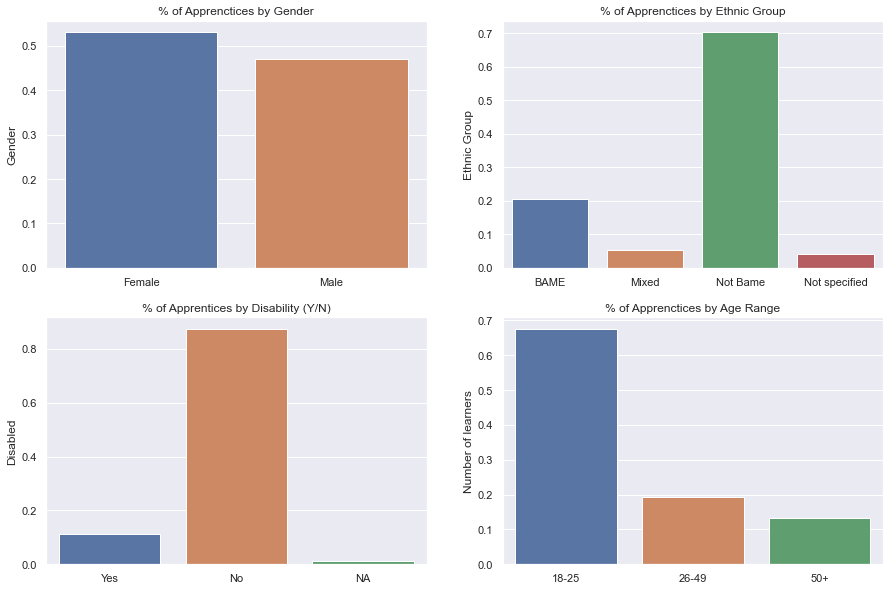

In [95]:
seg_cols = ['Gender', 'Ethnic Group', 'Disabled', 'Age Range']

fig = plt.figure(figsize=(15,10))
for i,c in enumerate(seg_cols):
    plot_index = i+1
    df = app_fdf[c].value_counts(normalize=True).to_frame().sort_index()
    _ = plt.subplot(2,2,plot_index)
    if c =='Disabled':
        _ = plt.title('% of Apprentices by Disability (Y/N)')
        _ = sns.barplot(x=['Yes','No', 'NA'], y=c, data=df)
    else:
        _ = plt.title('% of Apprenctices by ' + c)
        _ = sns.barplot(x=df.index, y=c, data=df)
_ = plt.ylabel('Number of learners')

plt.show()

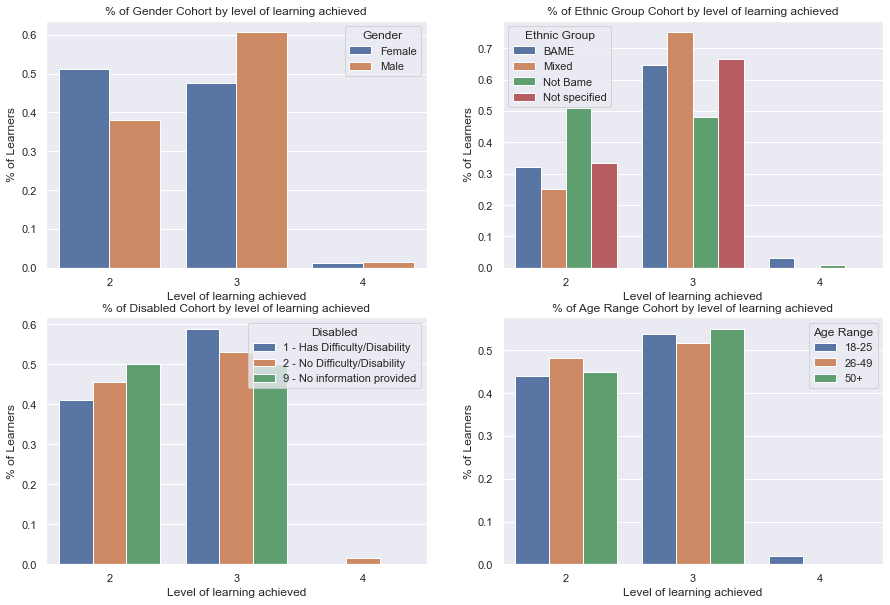

In [96]:
df = col_app.copy()

for i, c in enumerate(col_app['Levy Training area and Level']):
    words = c.split(' ')
    if words[-1] == '':
        new_c = ' '.join(words[0:-1])
        df.loc[i, 'Levy Training area and Level'] = new_c
    else:
        pass
    
df['level'] = df.apply(lambda row: row['Levy Training area and Level'].split(' ')[-1], axis=1)

fig = plt.figure(figsize=(15,10))
for i,c in enumerate(seg_cols):
    plot_df = df.groupby(c)['level'].value_counts(normalize=True).to_frame().sort_index().rename(columns={'level':'%'})
    plot_df.reset_index(level='level', inplace=True, drop=False)
    _ = plt.subplot(2,2,i+1)
    _ = sns.barplot(x='level', y='%', hue=plot_df.index, data=plot_df)
    _ = plt.ylabel('% of Learners')
    _ = plt.xlabel('Level of learning achieved')
    _ = plt.title('% of ' + c + ' Cohort by level of learning achieved')
plt.show()

### Fiddling

In [ ]:
def create_filters2(df):
    cols = list(df.columns)
    filter_cols = cols[cols.index('Gender'):cols.index('NumberOfLearners')]
    filters = []
    for c in filter_cols:
        f = df[c] == 'Total'
        filters.append(f)
    return filters, filter_cols

def apply_filters2(df, col_tf, keep_total):
    filters, filter_cols = create_filters2(df)
#     seg_ind = filter_cols.index(col_tf)
    if col_tf == 'none':
        pass
    else:
        seg_ind = filter_cols.index(col_tf)
        if keep_total==True:
            filters.pop(seg_ind)
        else:
            df = df[~filters[seg_ind]]
            filters.pop(seg_ind)
    for f in filters:
        df = df[f]
    df.reset_index(drop=True, inplace=True)
    return df


def format_ethnicity_data(df, col_tf, keep_total):
    cols = df.columns
    df.replace(to_replace = 'c', value=np.nan, inplace=True)
    
    filters, filter_cols = create_filters2(df)
    df = apply_filters2(df, col_tf, keep_total)
    
    for c in df.columns:
        if c == 'time_period':
            df[c] = df[c].astype(str)
        else:
            try:
                df[c] = pd.to_numeric(df[c])
            except:
                pass
    
    return df


df = format_ethnicity_data(otcms['nd01'], 'BAME', False)
df.head()
# filters, cols_tf = create_filters2(df)
# print(cols_tf)
print(len(df))

In [ ]:
pt, col_pt, rol_pt, ntl_pt = parse_data(otcms['ea01'], 2, False)

pt_gp = col_pt.groupby(['time_period', 'Provision'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
pt_gp.reset_index(drop=False, inplace=True)

# fig = plt.figure(figsize=(20,5))

# _ = plt.subplot(1,3,1)
# _ = sns.lineplot(x = 'time_period', y = 'SPDPercent', hue ='Provision', data = pt_gp, marker = 'o')
# _ = plt.title('Positive outcome rate by provision type', fontsize=16)

x_values = pt_gp['time_period'].unique()
prov_types = pt_gp['Provision'].unique()
y_values = []
y_percent = []

for pt in prov_types:
    y = np.array(pt_gp[pt_gp['Provision'] == pt]['NumberOfLearners'])
    y_values.append(y)

total = sum(y_values)
for i, y in enumerate(y_values):
    if i == 0:
        _ = plt.bar(x, y)
    else:
        bot = sum(y_values[:i])
        _ = plt.bar(x, y, bottom = bot)
    
for i, y in enumerate(y_values):
    y_per = y/total
    y_percent.append(y_per)
    if i == 0

plt.show()